In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import math
import re
import os
import seaborn as sbn
sbn.set_style("whitegrid")

import matplotlib.image as mpimg



Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [32]:
coords1 = (0.293,0,0)
coords2 = (-0.293,0,0)

coords_1_list = []
norientations = 50

TWOPI =2*math.pi
cos = math.cos
sin = math.sin

for x in range(0,norientations):
    phi = (x*TWOPI)/norientations# + i
    for y in range(0,(norientations)):
        theta = (y*pi)/(norientations)# + i
        for z in range(0,norientations):
            psi = (z*TWOPI)/norientations# + i

            rot00 = cos(phi)*cos(psi)-cos(theta)*sin(phi)*sin(psi)
            rot10 = sin(phi)*cos(psi)+cos(theta)*cos(phi)*sin(psi)
            rot20 = sin(theta)*sin(psi)
            rot01 = -cos(phi)*sin(psi)-cos(theta)*sin(phi)*cos(psi)
            rot11 = -sin(phi)*sin(psi)+cos(theta)*cos(phi)*cos(psi)
            rot21 = sin(theta)*cos(phi)
            rot02 = sin(theta)*sin(phi)
            rot12 = -sin(theta)*cos(phi)
            rot22 = cos(theta)
            
            newcoords1 = (coords1[0]*rot00 + coords1[1]*rot01 + coords1[2]*rot02, \
                          coords1[0]*rot10 + coords1[1]*rot11 + coords1[2]*rot12, \
                          coords1[0]*rot20 + coords1[1]*rot21 + coords1[2]*rot22)
            
            #newcoords2 = (coords2[0]*rot00 + coords2[1]*rot01 + coords2[2]*rot02, \
            #              coords2[0]*rot10 + coords2[1]*rot11 + coords2[2]*rot12, \
            #              coords2[0]*rot20 + coords2[1]*rot21 + coords2[2]*rot22)   
        
            coords_1_list.append(newcoords1)
                

         

#print(Ztrans)
#plt.plot(*zip(*points), marker='o', color='r', ls='')     


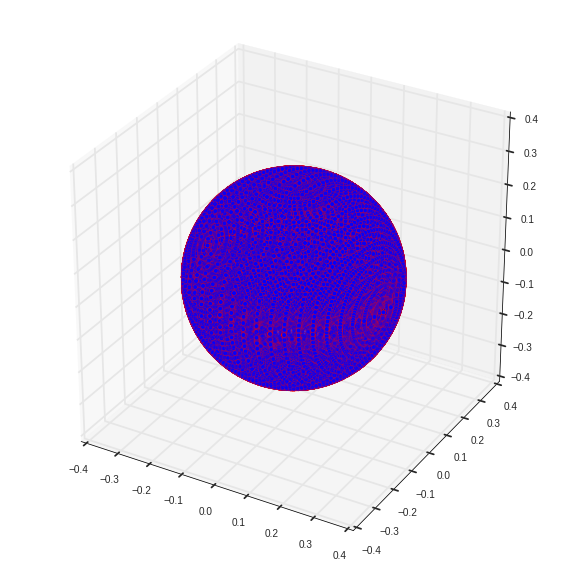

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,15))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

ax.scatter(*zip(*coords_1_list),marker="o",color="r")#,ls="")

#for angle in range(0, 360):
#    ax.view_init(azim=angle)
#    plt.draw()
#    plt.pause(.1)
    
# draw sphere
#for i in range(0,len(coords_1_list)/3,3):
#    x= coords_1_list[i]
#    y = coords_1_list[i+1]
#    z = coords_1_list[i+2]
#    #ax.plot_wireframe(x,y,z,color="r")

#    ax.plot(*zi)
#ax.plot_wireframe(x, y, z, color="r")

In [51]:
#There's a problem above: sometime the same coordinates reappear
#Follow this algorithm
#1 Start to positioning the dipole onto te y-axis
#2 Rotate from 0 to 360 around z
#3 Return in position 1 and rotate the dipole of theta deg about x axis
#4 Thus compute a new z axis, by rotatating it by theta deg about x
#5 Compute the rotation around the new z-axis
coords1 = (0,0.293,0) #1 positioning dipole onto y
coords2 = (0,-0.293,0,0)

coords_1_list = []

PI = math.pi
cos =math.cos
sin = math.sin

# 2 rotation around z
thetas = np.linspace(0,2*pi,50)
for theta in thetas:
    r00 = cos(theta)
    r01 = -sin(theta)
    r10 = sin(theta)
    r11 = cos(theta)
    r33 = 1
    
    newcoords1 = ( coords1[0]*r00 + coords1[1]*r01 + 0,\
                   coords1[0]*r10 + coords1[1]*r11 + 0,\
                   coords1[2])
    if theta==2*pi:
        pass
    else:
        coords_1_list.append(newcoords1)
        
#3 return to the original position
coords1 = (0,0.293,0) #1 positioning dipole onto y
angle_rot = 30*pi/180.0
#compute the new coords1 by rotating them about x axis of 30 deg
coords1 = (coords1[0]*1,\
           0 +          coords1[1]*cos(angle_rot) + coords1[2]*-sin(angle_rot),\
           0 +          coords1[1]*sin(angle_rot) + coords1[2]*cos(angle_rot))
#4 compute the new z axis
z_old = (0,0,1)
z_new = (0,\
         -sin(angle_rot)*z_old[2],\
         cos(angle_rot)*z_old[2])
#5 rotate around the new z
thetas = np.linspace(0,2*pi,50)
for theta in thetas:
    r00 = cos(theta) + (z_new[0]**2)*(1-cos(theta))
    r01 = z_new[0]*z_new[1]*(1-cos(theta)) - z_new[2]*sin(theta)
    r02 = z_new[0]*z_new[2]*(1-cos(theta)) - z_new[1]*sin(theta)
    
    r10 = z_new[0]*z_new[1]*(1-cos(theta))+ z_new[2]*sin(theta)
    r11 = cos(theta) + (z_new[1]**2)*(1-cos(theta))
    r12 = z_new[1]*z_new[2]*(1-cos(theta))-z_new[0]*sin(theta)
    
    r20 = z_new[0]*z_new[2]*(1-cos(theta)) - z_new[1]*sin(theta)
    r21 = z_new[1]*z_new[2]*(1-cos(theta)) + z_new[0]*sin(theta)
    r22 = cos(theta) + (z_new[2]**2)*(1-cos(theta))
    
    newcoords1 = ( coords1[0]*r00 + coords1[1]*r01 + coords1[2]*r02,\
                   coords1[0]*r10 + coords1[1]*r11 + coords1[2]*r12,\
                   coords1[0]*r20 + coords1[1]*r21 + coords1[2]*r22)
    if theta==2*pi:
        pass
    else:
        coords_1_list.append(newcoords1)

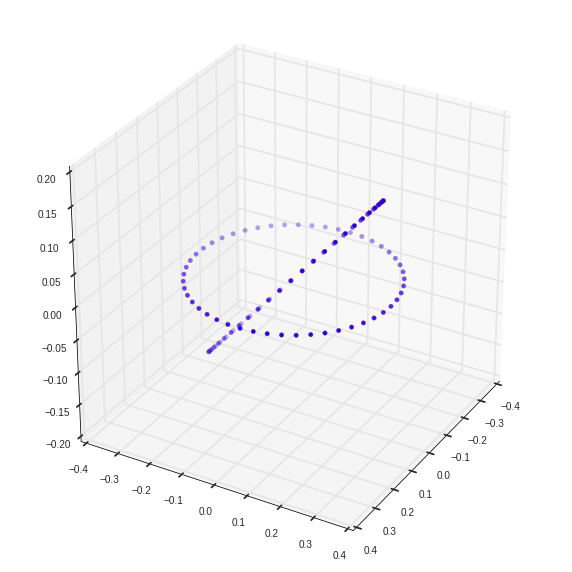

In [52]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,15))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

ax.scatter(*zip(*coords_1_list),marker="o",color="r")#,ls="")
ax.view_init(azim=30)
#for angle in range(0, 360):
#    ax.view_init(azim=angle)
#    plt.draw()
#    plt.pause(.1)
    
# draw sphere
#for i in range(0,len(coords_1_list)/3,3):
#    x= coords_1_list[i]
#    y = coords_1_list[i+1]
#    z = coords_1_list[i+2]
#    #ax.plot_wireframe(x,y,z,color="r")

#    ax.plot(*zi)
#ax.plot_wireframe(x, y, z, color="r")

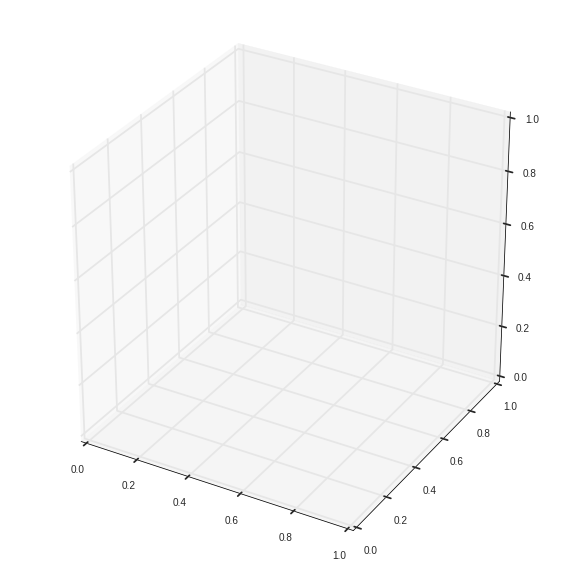

In [76]:
from mpl_toolkits.mplot3d import Axes3D
import time
from IPython import display
fig = plt.figure(figsize=(10,15))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

plt.ion()    

#loop all the previous functions
start1 = (0,0.293,0) #1 positioning dipole onto y
z_axis = (0,0,1) #define the z axis
coords_1_list = []#storing
rot_deg = 3
rot = rot_deg*pi/180.0
n_rotations = 180/rot_deg # let's do 12 rotations
thetas = np.linspace(0,pi,50)
#constant
PI = math.pi
cos =math.cos
sin = math.sin
new_start = []
zaxis_list = [] #middle point coord list, the middle poitn must always be in 0.0

for i in range(0,n_rotations):
    #set the coords
    
    #print("Setting coords")
    if i==0:
        coords1 = start1
        z_ax = z_axis
    
    else:
        coords1 = start2
        z_ax = z_axis2
    #print("Stating theta calculation")
    for theta in thetas:
        
        r00 = cos(theta) + (z_axis[0]**2)*(1-cos(theta))
        r01 = z_ax[0]*z_ax[1]*(1-cos(theta)) - z_ax[2]*sin(theta)
        r02 = z_ax[0]*z_ax[2]*(1-cos(theta)) + z_ax[1]*sin(theta)

        r10 = z_ax[0]*z_ax[1]*(1-cos(theta))+ z_ax[2]*sin(theta)
        r11 = cos(theta) + (z_ax[1]**2)*(1-cos(theta))
        r12 = z_ax[1]*z_ax[2]*(1-cos(theta))-z_ax[0]*sin(theta)

        r20 = z_ax[0]*z_ax[2]*(1-cos(theta)) - z_ax[1]*sin(theta)
        r21 = z_ax[1]*z_ax[2]*(1-cos(theta)) + z_ax[0]*sin(theta)
        r22 = cos(theta) + (z_ax[2]**2)*(1-cos(theta))
        
        newcoords1 = ( coords1[0]*r00 + coords1[1]*r01 + coords1[2]*r02,\
               coords1[0]*r10 + coords1[1]*r11 + coords1[2]*r12,\
               coords1[0]*r20 + coords1[1]*r21 + coords1[2]*r22)
        

        if theta==2*pi:
            pass
        else:
            coords_1_list.append(newcoords1)
           
            #plt.gca().cla()
            #ax.scatter(*zip(*coords_1_list),marker="o",color="r")
            #ax.set_xlabel("X axis",fontsize=20)
            #ax.set_ylabel("Y axis",fontsize=20)
            #ax.set_zlabel("Z axis",fontsize=20)
            #display.clear_output(wait=True)
            #display.display(plt.gcf())
            #time.sleep(0.001)

            

    
    #rotate the z axis
    z_axis2 = (0,\
             -sin(rot)*z_axis[2],\
             cos(rot)*z_axis[2])
    zaxis_list.append(z_axis2)
    
    start2 = (start1[0]*1,\
           0 +          start1[1]*cos(rot) + start1[2]*-sin(rot),\
           0 +          start1[1]*sin(rot) + start1[2]*cos(rot))
    
    rot = rot + rot_deg*pi/180.0
    #print("New coords...")
    #print(start2)
    #new_start.append(start2)
    
    #jjust for plotting then comment below
    #coords_1_list = []
    


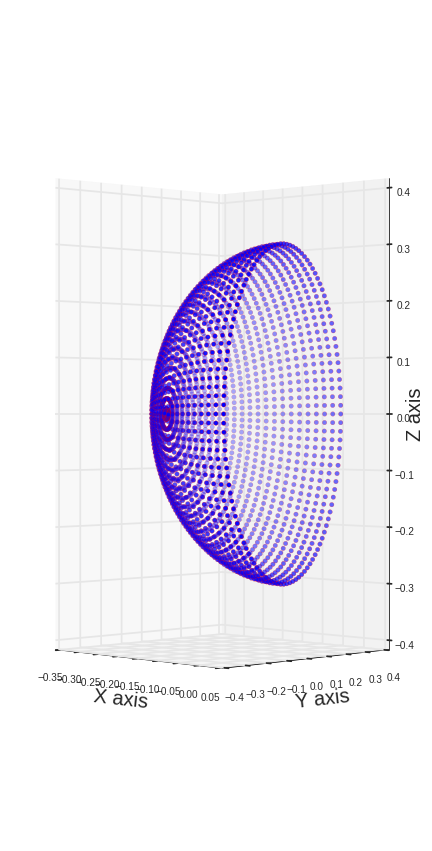

In [83]:
from mpl_toolkits.mplot3d import Axes3D
import time
from IPython import display
fig = plt.figure(figsize=(10,15))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")
ax.scatter(*zip(*coords_1_list),marker="o",color="r")
ax.set_xlabel("X axis",fontsize=20)
ax.set_ylabel("Y axis",fontsize=20)
ax.set_zlabel("Z axis",fontsize=20)
#display.clear_output(wait=True)
#display.display(plt.gcf())
#time.sleep(0.001)
ax.view_init(elev=0,azim=-45 )

In [88]:
inpf = open("../30angstrom/coords_list.dat","r")
coords = []
for line in inpf.readlines():
    x = float(line.split(",")[0])
    y = float(line.split(",")[1])
    z = float(line.split(",")[2])
    coord = [x,y,z]
    coords.append(coord)

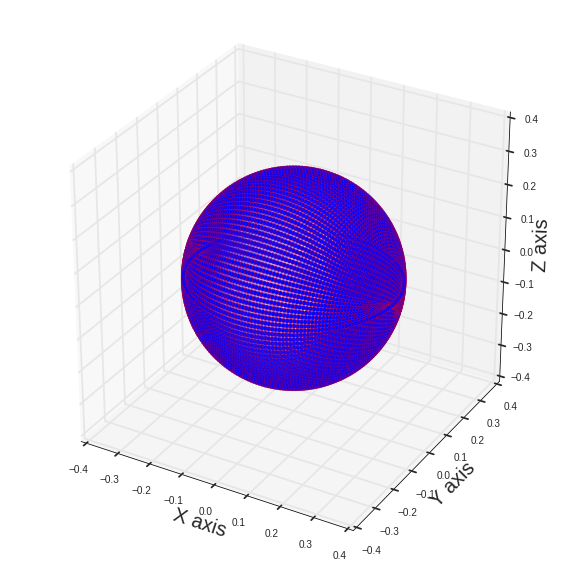

In [92]:
fig = plt.figure(figsize=(10,15))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")
ax.scatter(*zip(*coords),marker="o",color="r")
ax.set_xlabel("X axis",fontsize=20)
ax.set_ylabel("Y axis",fontsize=20)
ax.set_zlabel("Z axis",fontsize=20)
#display.clear_output(wait=True)
#display.display(plt.gcf())
#time.sleep(0.001)
#ax.view_init(elev=0,azim=-45 )